# Capstone Project — The Battle of Neighbourhoods

## Introduction

Ankara is capital city of Turkey and also one of the most beautiful city in Turkey. With its diverse culture, comes diverse food items. There are many restaurants in Ankara, each belongs to different categories like Chinese , Italian , French etc.
So as part of this project , we will list and visualize all major parts of Ankara.

## Objectives

Questions that can be asked using the above mentioned datasets
 - What is best location in Ankara for kebab?
 - Which areas have large number of kebab market ?
 - Which all areas have less number of restaurant ?
 - Which is the best place to stay if I prefer kebab ?
 - What places are have best restaurant in Ankara?



## Data

For this project we need the following data :
 - Ankara Restaurants data that contains list Locality, Restaurant name,Rating along with their latitude and longitude.
 - Data source : Zomato kaggle dataset (https://www.kaggle.com/slayomer/zomato-istanbul-restaurants/data?select=zomato.csv)
 - Description : This data set contains the required information. And we will use this data set to explore various locality of Ankara.
 - Nearby places in each locality of Ankara.
 - Data source : Fousquare API
 - Description : By using this api we will get all the venues in each neighborhood.


## Approach and Methodology
 - Collect the Ankara data from Zomato kaggle dataset
 - Using FourSquare API we will find all venues for each neighborhood.
 - Filter out all venues that are nearby by locality.
 - Using aggregative rating for each resturant to find the best places.
 - Visualize the Ranking of neighborhoods using folium library.

In [1]:
import pandas as pd
import numpy as np
# library to handle requests
import requests
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
import folium 
# ! pip install geocoder
import geocoder
from geopy.geocoders import Nominatim

/home/srkn/snap/jupyter/common/lib/python3.7/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv('zomato.csv')
df.tail(15)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
7512,5908736,BigChefs,208,İstanbul,"Tarabya Mahallesi, Yeniköy Tarabya Caddesi, No...",Tarabya Merkez,"Tarabya Merkez, İstanbul",29.058512,41.136700,Restaurant Cafe,...,Turkish Lira(TL),0,0,0,0,4,4.0,5BA829,Very Good,1271
7513,18089353,Mükellef,208,İstanbul,"The Haze İstanbul, Kemankeş Karamustafa Paşa M...","The Haze İstanbul, Karaköy, Beyoğlu","The Haze İstanbul, Karaköy, Beyoğlu, İstanbul",28.976994,41.023675,"Old Turkish Bars, Turkish",...,Turkish Lira(TL),0,0,0,0,4,4.4,5BA829,Very Good,946
7514,5902241,The House Cafe,208,İstanbul,"Mecidiye Mahallesi, Ortaköy Salhanesi Sokak, N...","The House Hotel Bosphorus, Ortaköy, Beşiktaş","The House Hotel Bosphorus, Ortaköy, Beşiktaş, ...",29.025293,41.047551,"Cafe, World Cuisine",...,Turkish Lira(TL),0,0,0,0,4,4.2,5BA829,Very Good,1248
7515,5924090,Arada Cafe,208,İstanbul,"Hacımimi Mahallesi, Lüleci Hendek Caddesi, No ...",Tophane,"Tophane, İstanbul",28.978181,41.026647,"Cafe, Lebanese",...,Turkish Lira(TL),0,0,0,0,4,4.4,5BA829,Very Good,588
7516,16698665,Tuzla Balıkçısı,208,İstanbul,"Postane Mahallesi, Manastır Yolu, No 4, Tuzla,...",Tuzla Merkez,"Tuzla Merkez, İstanbul",29.297681,40.816901,"Fresh Fish, Seafood",...,Turkish Lira(TL),0,0,0,0,4,4.6,3F7E00,Excellent,942
7517,18384475,Happy Moon's,208,İstanbul,"Watergarden Yaşam Merkezi, Barbaros Mahallesi,...","Watergarden, Batı Ataşehir, Ataşehir","Watergarden, Batı Ataşehir, Ataşehir, İstanbul",29.099755,40.998032,World Cuisine,...,Turkish Lira(TL),0,0,0,0,4,4.4,5BA829,Very Good,503
7518,18384475,Happy Moon's,208,İstanbul,"Watergarden Yaşam Merkezi, Barbaros Mahallesi,...","Watergarden, Batı Ataşehir, Ataşehir","Watergarden, Batı Ataşehir, Ataşehir, İstanbul",29.099755,40.998032,World Cuisine,...,Turkish Lira(TL),0,0,0,0,4,4.4,5BA829,Very Good,503
7519,18384621,The Hunger Cafe & Brasserie,208,İstanbul,"Watergarden Yaşam Merkezi, Barbaros Mahallesi,...","Watergarden, Batı Ataşehir, Ataşehir","Watergarden, Batı Ataşehir, Ataşehir, İstanbul",29.099751,40.998086,World Cuisine,...,Turkish Lira(TL),0,0,0,0,4,4.4,5BA829,Very Good,557
7520,18264711,Ercan Steakhouse,208,İstanbul,"Ziya Gökalp Mahallesi, Atatürk Bulvarı, No 112...",Ziya Gökalp,"Ziya Gökalp, İstanbul",28.802820,41.088293,Steak,...,Turkish Lira(TL),0,0,0,0,4,4.1,5BA829,Very Good,503
7521,18286221,Sarıhan,208,İstanbul,"İkitelli OSB Mahallesi, Atatürk Bulvarı, No 98...",Ziya Gökalp,"Ziya Gökalp, İstanbul",28.804868,41.084974,"Giblets, Izgara, Home-made",...,Turkish Lira(TL),0,0,0,0,3,4.4,5BA829,Very Good,500


In [3]:
df.shape

(7527, 21)

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df_turkey = df[df['Country Code'] == 208]
df_ankara = df_turkey[df_turkey['City'] == 'Ankara']
df_ankara.reset_index(drop=True, inplace=True)
df_ankara.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6005108,Downtown Food Club,208,Ankara,"Armada AVM, Eskişehir Yolu, Hayat Sokağı, No 4...","Armada AVM, Söğütözü, Yenimahalle","Armada AVM, Söğütözü, Yenimahalle, Ankara",32.809021,39.912703,World Cuisine,...,Turkish Lira(TL),0,0,0,0,2,4.1,5BA829,Very Good,125
1,6001980,Timboo Cafe,208,Ankara,"Armada AVM, Kat -1, Eskişehir Yolu, No 6, Yeni...","Armada AVM, Söğütözü, Yenimahalle","Armada AVM, Söğütözü, Yenimahalle, Ankara",32.809247,39.913206,Cafe,...,Turkish Lira(TL),0,0,0,0,3,4.3,5BA829,Very Good,234
2,6005865,The Italian Cut Pizza & Kitchen,208,Ankara,"Bahçelievler Mahallesi, Azerbaycan Caddesi, No...",Bahçelievler,"Bahçelievler, Ankara",32.829625,39.920261,Pizza,...,Turkish Lira(TL),0,0,0,0,2,4.6,3F7E00,Excellent,261
3,6005869,Varuna Gezgin Cafe,208,Ankara,"Bahçelievler Mahallesi, Azerbaycan Caddesi, No...",Bahçelievler,"Bahçelievler, Ankara",32.828972,39.921603,Cafe,...,Turkish Lira(TL),0,0,0,0,3,3.8,9ACD32,Good,116
4,6001054,Marco Pascha,208,Ankara,"Bahçelievler Mahallesi, Aşkaabat Caddesi (7. C...",Bahçelievler,"Bahçelievler, Ankara",32.825833,39.923000,"World Cuisine, Cafe",...,Turkish Lira(TL),0,0,0,0,3,2.1,FF7800,Poor,209


## Data preprocess

In [6]:
# remove the unwanted columns and rows from dataset
df_Res= df_ankara[df_ankara.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head(5)

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Downtown Food Club,"Armada AVM, Söğütözü, Yenimahalle",32.809021,39.912703,World Cuisine,4.1,Very Good,125
1,Timboo Cafe,"Armada AVM, Söğütözü, Yenimahalle",32.809247,39.913206,Cafe,4.3,Very Good,234
2,The Italian Cut Pizza & Kitchen,Bahçelievler,32.829625,39.920261,Pizza,4.6,Excellent,261
3,Varuna Gezgin Cafe,Bahçelievler,32.828972,39.921603,Cafe,3.8,Good,116
4,Marco Pascha,Bahçelievler,32.825833,39.923000,"World Cuisine, Cafe",2.1,Poor,209


In [7]:
# Get and print Ankara latitude, longitude
address = 'Ankara, Turkey'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ankara are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ankara are 39.9207486, 32.8540093.


## create map to show the restaurants

In [8]:
Istanbul_Rest = folium.Map(location=[39.92, 32.85], zoom_start=11)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster, resname in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster'], df_Res['Restaurant Name']):
    label = folium.Popup(str(resname)+'\n'+str(Locality), parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Istanbul_Rest)  

Istanbul_Rest

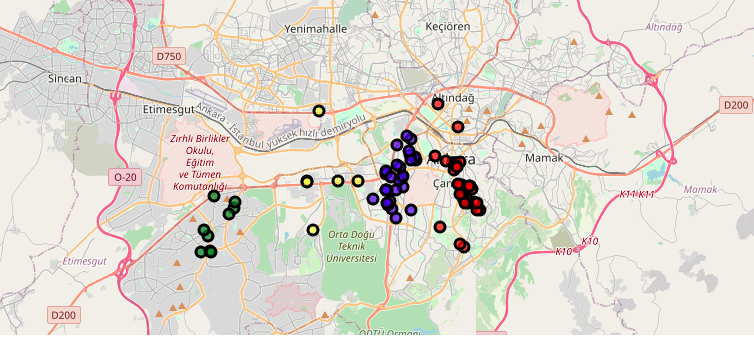

In [9]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Downtown Food Club,"Armada AVM, Söğütözü, Yenimahalle",32.809021,39.912703,World Cuisine,4.1,Very Good,125,2
1,Timboo Cafe,"Armada AVM, Söğütözü, Yenimahalle",32.809247,39.913206,Cafe,4.3,Very Good,234,2
2,The Italian Cut Pizza & Kitchen,Bahçelievler,32.829625,39.920261,Pizza,4.6,Excellent,261,2
3,Varuna Gezgin Cafe,Bahçelievler,32.828972,39.921603,Cafe,3.8,Good,116,2
4,Marco Pascha,Bahçelievler,32.825833,39.923000,"World Cuisine, Cafe",2.1,Poor,209,2


## What places are have best restaurant in Ankara?

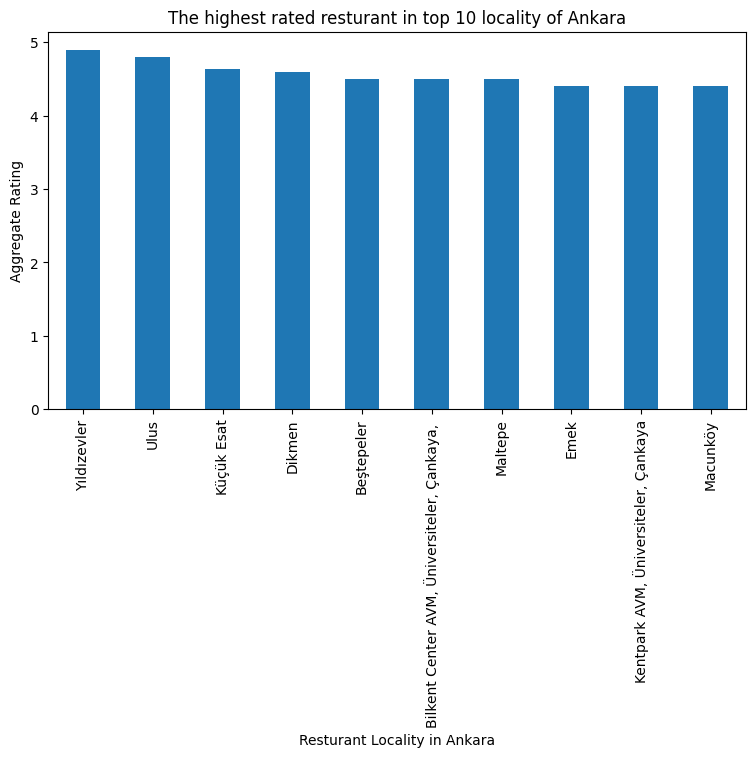

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Ankara')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in **_Yıldızevler_** area.

## What places are have worst restaurants in Ankara?

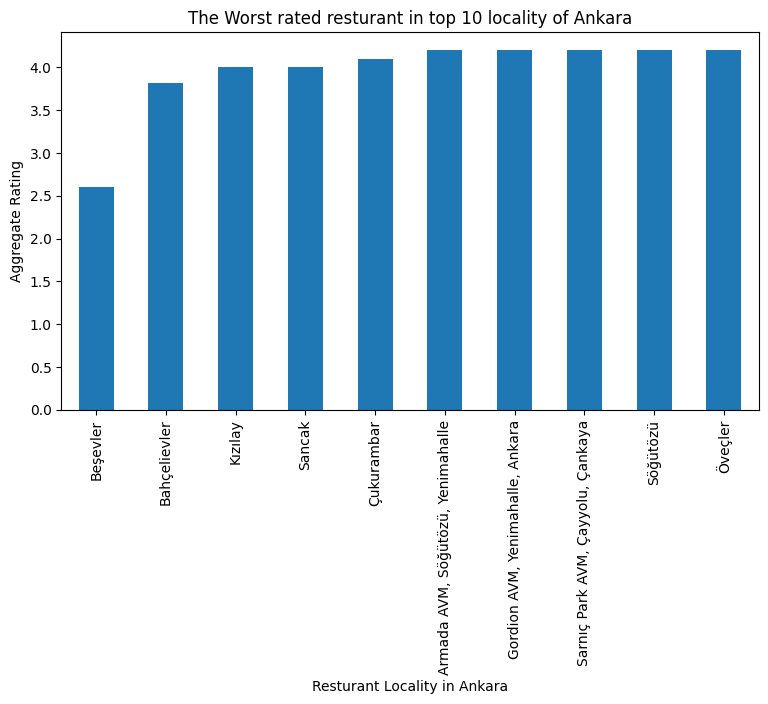

In [11]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Ankara')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst rated restarants are available in **_Beşevler_** area.

## Which place are suitable for edible person in Ankara?

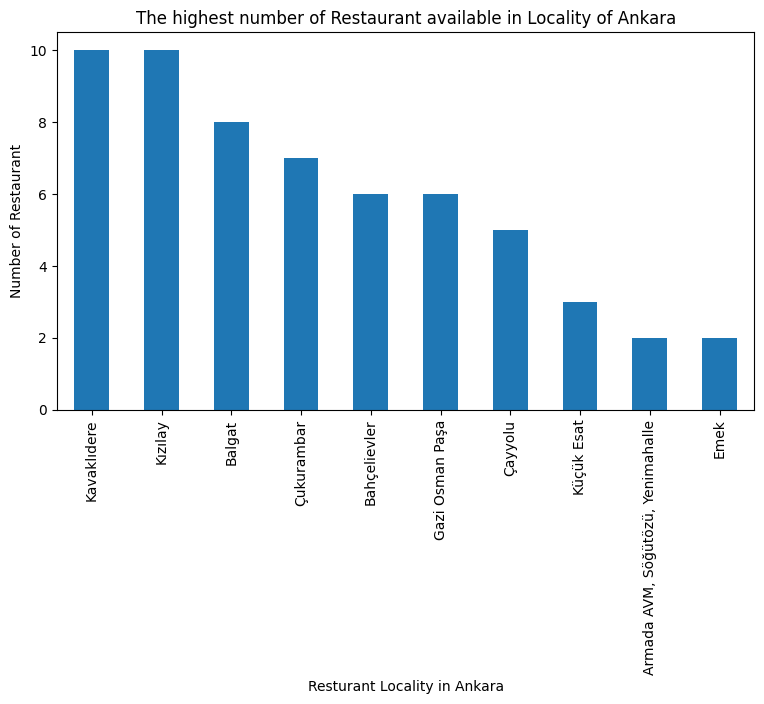

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Ankara')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

_**Kavaklıdere**_ is the best places for edible person in Ankara.

## Which place are not suitable for edible person in Ankara?

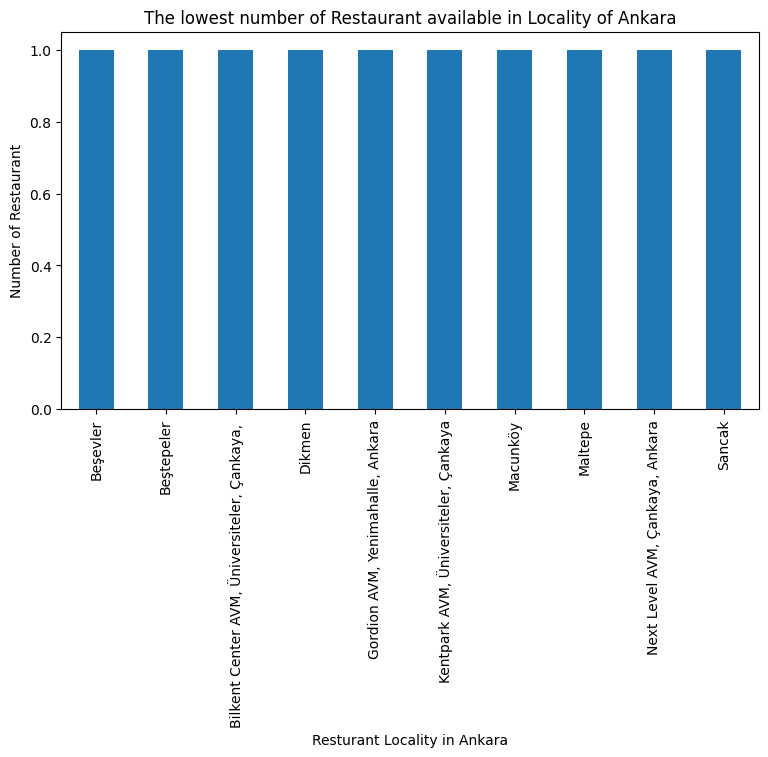

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Ankara')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for kebab in Ankara?

In [14]:
df_Res[df_Res['Cuisines'].str.startswith('Kebab')]

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
8,Hattena Hatay Sofrası,Balgat,32.821214,39.905972,Kebab,4.8,Excellent,343,2
9,Masabaşı Kebapçısı,Balgat,32.820300,39.910697,"Kebab, Turkish Pizza",4.6,Excellent,360,2
14,Bayram Usta Yaprak Kebap,Balgat,32.813096,39.894325,"Kebab, Turkish",4.4,Very Good,97,2
19,Meşhur Tavacı Recep Usta,Dikmen,32.846189,39.884872,Kebab,4.6,Excellent,299,0
20,Çukurağa Sofrası,Emek,32.818833,39.916667,"Kebab, Izgara",4.5,Excellent,450,2
31,Hacı Arif Bey Restaurant,Kavaklıdere,32.862167,39.902000,Kebab,4.5,Excellent,157,0
36,Kebap 49,Kavaklıdere,32.860144,39.907272,"Kebab, Turkish Pizza",4.4,Very Good,161,0
40,Devrez,Küçük Esat,32.868333,39.905167,Kebab,4.6,Excellent,193,0
41,Meşhur Özçelik Aspava,Küçük Esat,32.866633,39.906636,"Kebab, Turkish Pizza",4.7,Excellent,222,0
42,Yıldız Aspava,Küçük Esat,32.866608,39.906569,"Kebab, Turkish Pizza, Döner",4.6,Excellent,100,0


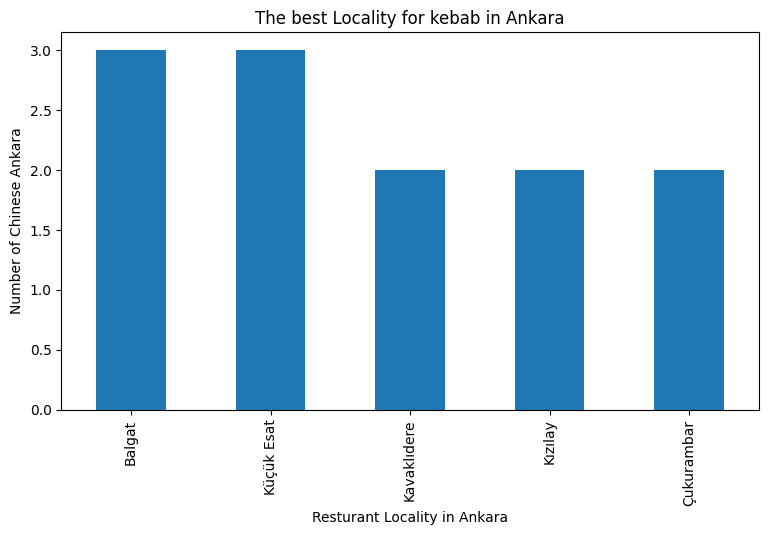

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for kebab in Ankara')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Kebab')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Number of Chinese Ankara')

#displays the plot
plt.show()

_**Balgat**_ is the best place for eating kebab in Ankara.

## Which places are the best kebab resturants in Ankara?

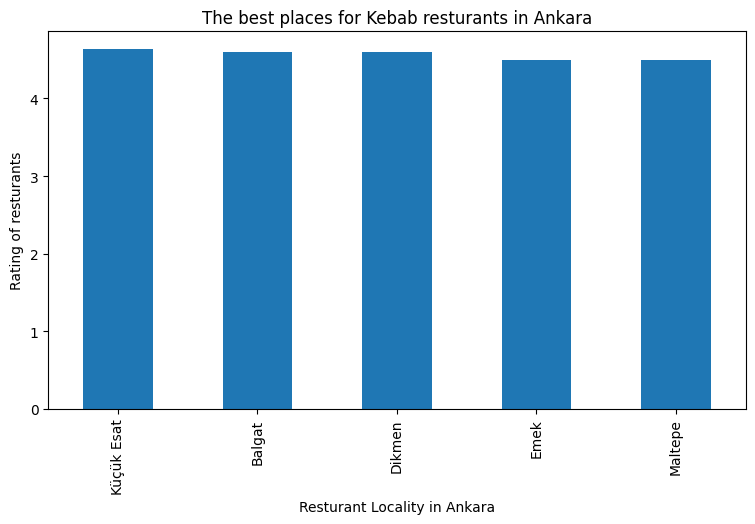

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Kebab resturants in Ankara')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Kebab')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

_**Küçük Esat**_ is the best place for kebab resturant in Ankara.

# Data transformation

Based on Locality grouping the data

In [17]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [18]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"Armada AVM, Söğütözü, Yenimahalle",39.912954,32.809134,2,"World Cuisine, Cafe",4.200000,Very Good,359
1,Bahçelievler,39.923588,32.827100,6,"Pizza, Cafe, World Cuisine, Cafe, Desserts, Wo...",3.816667,"Excellent, Good, Poor, Very Good",1048
2,Balgat,39.906868,32.817850,8,"Kebab, Kebab, Turkish Pizza, Izgara, Giblets, ...",4.300000,"Excellent, Good, Very Good",1532
3,Beşevler,39.932667,32.823833,1,"Cafe, World Cuisine",2.600000,Average,224
4,Beştepeler,39.914525,32.809091,1,"Cafe, World Cuisine",4.500000,Excellent,125


In [19]:
df_final.shape

(29, 8)

## Define Foursquare Credentials and Version

In [20]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ZUYCAWPIFV4ZEZIKV2SZ3KCWLBBE53XYBAA1YGTLWA5YVT15' # Foursquare ID
CLIENT_SECRET = 'IFOJI4TZZN14OHLANGAWGO5IDA4QAPYQSHXC1YNGLI1VLZUJ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: ZUYCAWPIFV4ZEZIKV2SZ3KCWLBBE53XYBAA1YGTLWA5YVT15
CLIENT_SECRET:IFOJI4TZZN14OHLANGAWGO5IDA4QAPYQSHXC1YNGLI1VLZUJ


In [21]:
## create a function to repeat the same process to all the Locality in Ankara

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# find the venues in all Ankara Locality
ankara_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Armada AVM, Söğütözü, Yenimahalle
Bahçelievler
Balgat
Beşevler
Beştepeler
Bilkent Center AVM, Üniversiteler, Çankaya, 
Dikmen
Emek
Gazi Osman Paşa
Gordion AVM, Yenimahalle, Ankara
Kavaklıdere
Kentpark AVM, Üniversiteler, Çankaya
Küçük Esat
Kızılay
Macunköy
Maltepe
Next Level AVM, Çankaya, Ankara
Sancak
Sarnıç Park AVM, Çayyolu, Çankaya
Seğmenler
Söğütözü
Tepe Prime AVM, Üniversiteler, Çankaya
Ulus
Yıldızevler
Çayyolu
Çukurambar
Öveçler
Ümitköy
İskitler, Altındağ


In [23]:
ankara_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Armada AVM, Söğütözü, Yenimahalle",39.912954,32.809134,Via Flat Yaşam Sokağı,39.914038,32.807901,General Entertainment
1,"Armada AVM, Söğütözü, Yenimahalle",39.912954,32.809134,Paşabahçe,39.913190,32.808939,Furniture / Home Store
2,"Armada AVM, Söğütözü, Yenimahalle",39.912954,32.809134,Harley-Davidson Ankara,39.913863,32.809345,Motorcycle Shop
3,"Armada AVM, Söğütözü, Yenimahalle",39.912954,32.809134,Network,39.912811,32.809005,Clothing Store
4,"Armada AVM, Söğütözü, Yenimahalle",39.912954,32.809134,Köz Biber Ocakbaşı,39.914190,32.807940,Kebab Restaurant


In [24]:
ankara_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Armada AVM, Söğütözü, Yenimahalle",96,96,96,96,96,96
Bahçelievler,99,99,99,99,99,99
Balgat,100,100,100,100,100,100
Beşevler,68,68,68,68,68,68
Beştepeler,100,100,100,100,100,100
"Bilkent Center AVM, Üniversiteler, Çankaya,",51,51,51,51,51,51
Dikmen,32,32,32,32,32,32
Emek,79,79,79,79,79,79
Gazi Osman Paşa,71,71,71,71,71,71


In [25]:
print('There are {} uniques categories.'.format(len(ankara_venues['Venue Category'].unique())))

There are 226 uniques categories.


In [26]:
## Analyze Each Locality

# one hot encoding
ankara_onehot = pd.get_dummies(ankara_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
ankara_onehot['Locality'] = ankara_venues['Locality'] 

# move Locality column to the first column
column_list = ankara_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
ankara_onehot = ankara_onehot[column_list]

ankara_onehot.head()

,Locality,Accessories Store,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,...,Video Game Store,Video Store,Volleyball Court,Watch Shop,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Armada AVM, Söğütözü, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Armada AVM, Söğütözü, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Armada AVM, Söğütözü, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Armada AVM, Söğütözü, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Armada AVM, Söğütözü, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
ankara_grouped = ankara_onehot.groupby('Locality').mean().reset_index()
ankara_grouped

,Locality,Accessories Store,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,...,Video Game Store,Video Store,Volleyball Court,Watch Shop,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Armada AVM, Söğütözü, Yenimahalle",0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.010417
1,Bahçelievler,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Balgat,0.00,0.000000,0.00,0.000000,0.020000,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Beşevler,0.00,0.014706,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,0.000000,0.014706,0.029412,0.00,0.000000,0.00,0.000000,0.014706,0.000000,0.000000
4,Beştepeler,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.010000,0.010000
5,"Bilkent Center AVM, Üniversiteler, Çankaya,",0.00,0.000000,0.00,0.000000,0.000000,0.019608,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Dikmen,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,Emek,0.00,0.000000,0.00,0.012658,0.000000,0.000000,0.00,0.00,0.025316,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
8,Gazi Osman Paşa,0.00,0.000000,0.00,0.000000,0.000000,0.028169,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.014085
9,"Gordion AVM, Yenimahalle, Ankara",0.00,0.000000,0.00,0.000000,0.000000,0.013889,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.013889,0.00,0.000000,0.000000,0.027778,0.000000


In [28]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in ankara_grouped['Locality']:
    print("----"+hood+"----")
    temp = ankara_grouped[ankara_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Armada AVM, Söğütözü, Yenimahalle----
            venue  freq
0  Clothing Store  0.07
1            Café  0.07
2     Coffee Shop  0.06
3      Restaurant  0.05
4          Lounge  0.04


----Bahçelievler----
          venue  freq
0   Coffee Shop  0.14
1          Café  0.12
2           Pub  0.05
3       Meyhane  0.04
4  Dance Studio  0.04


----Balgat----
                venue  freq
0  Turkish Restaurant  0.10
1                Café  0.09
2        Dessert Shop  0.09
3         Coffee Shop  0.05
4    Kebab Restaurant  0.05


----Beşevler----
          venue  freq
0          Café  0.28
1   Coffee Shop  0.10
2           Pub  0.06
3  Burger Joint  0.06
4        Bakery  0.03


----Beştepeler----
            venue  freq
0  Clothing Store  0.14
1     Coffee Shop  0.06
2      Restaurant  0.06
3            Café  0.05
4  Cosmetics Shop  0.04


----Bilkent Center AVM, Üniversiteler, Çankaya, ----
            venue  freq
0     Coffee Shop  0.12
1            Café  0.10
2      Restaurant  0.04
3  Sand

In [29]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = ankara_grouped['Locality']

for ind in np.arange(ankara_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ankara_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Armada AVM, Söğütözü, Yenimahalle",Clothing Store,Café,Coffee Shop,Restaurant,Lounge,Hotel,Bookstore,Spa,Steakhouse,Bar
1,Bahçelievler,Coffee Shop,Café,Pub,Meyhane,Dance Studio,Dessert Shop,Pizza Place,Grocery Store,Restaurant,Kebab Restaurant
2,Balgat,Turkish Restaurant,Café,Dessert Shop,Coffee Shop,Kebab Restaurant,Hookah Bar,Steakhouse,Burger Joint,Electronics Store,Bakery
3,Beşevler,Café,Coffee Shop,Pub,Burger Joint,Bakery,Turkish Restaurant,Volleyball Court,Hotel,Breakfast Spot,Health & Beauty Service
4,Beştepeler,Clothing Store,Coffee Shop,Restaurant,Café,Cosmetics Shop,Sporting Goods Shop,Hotel,Seafood Restaurant,Pharmacy,Convenience Store
5,"Bilkent Center AVM, Üniversiteler, Çankaya,",Coffee Shop,Café,Restaurant,Sandwich Place,Pool,Shopping Mall,Pizza Place,Italian Restaurant,Seafood Restaurant,Clothing Store
6,Dikmen,Gym / Fitness Center,Paper / Office Supplies Store,Park,Turkish Restaurant,Café,Scenic Lookout,Gastropub,Gym Pool,Grocery Store,Campground
7,Emek,Turkish Restaurant,Café,Coffee Shop,Kebab Restaurant,Gym,Food,Bakery,Grocery Store,Park,Snack Place
8,Gazi Osman Paşa,Seafood Restaurant,Hotel,Restaurant,Turkish Restaurant,Bridal Shop,Meyhane,Kebab Restaurant,Café,Steakhouse,Chocolate Shop
9,"Gordion AVM, Yenimahalle, Ankara",Clothing Store,Café,Furniture / Home Store,Cosmetics Shop,Park,Sandwich Place,Burger Joint,Department Store,Restaurant,Boutique


In [31]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

ankara_clustering = ankara_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ankara_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(29,)

In [32]:
# add clustering labels
ankara_merged = df_final.head(240)
ankara_merged['Cluster Labels'] = kmeans.labels_

# merge ankara_grouped with df_ankara to add latitude/longitude for each Locality
ankara_merged = ankara_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

ankara_merged.head()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Armada AVM, Söğütözü, Yenimahalle",39.912954,32.809134,2,"World Cuisine, Cafe",4.200000,Very Good,359,3,Clothing Store,Café,Coffee Shop,Restaurant,Lounge,Hotel,Bookstore,Spa,Steakhouse,Bar
1,Bahçelievler,39.923588,32.827100,6,"Pizza, Cafe, World Cuisine, Cafe, Desserts, Wo...",3.816667,"Excellent, Good, Poor, Very Good",1048,1,Coffee Shop,Café,Pub,Meyhane,Dance Studio,Dessert Shop,Pizza Place,Grocery Store,Restaurant,Kebab Restaurant
2,Balgat,39.906868,32.817850,8,"Kebab, Kebab, Turkish Pizza, Izgara, Giblets, ...",4.300000,"Excellent, Good, Very Good",1532,0,Turkish Restaurant,Café,Dessert Shop,Coffee Shop,Kebab Restaurant,Hookah Bar,Steakhouse,Burger Joint,Electronics Store,Bakery
3,Beşevler,39.932667,32.823833,1,"Cafe, World Cuisine",2.600000,Average,224,1,Café,Coffee Shop,Pub,Burger Joint,Bakery,Turkish Restaurant,Volleyball Court,Hotel,Breakfast Spot,Health & Beauty Service
4,Beştepeler,39.914525,32.809091,1,"Cafe, World Cuisine",4.500000,Excellent,125,3,Clothing Store,Coffee Shop,Restaurant,Café,Cosmetics Shop,Sporting Goods Shop,Hotel,Seafood Restaurant,Pharmacy,Convenience Store


In [33]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ankara_merged['Lat'], ankara_merged['Lng'], ankara_merged['Locality'], ankara_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

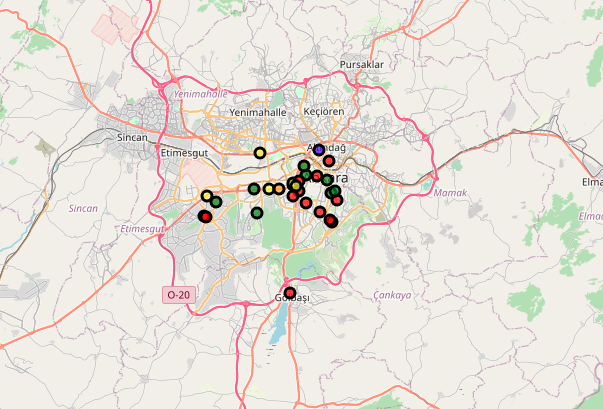

In [34]:
## Examine Clusters

## Cluster 1
ankara_merged.loc[ankara_merged['Cluster Labels'] == 0, ankara_merged.columns[[1] + list(range(5, ankara_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,39.906868,4.300000,"Excellent, Good, Very Good",1532,0,Turkish Restaurant,Café,Dessert Shop,Coffee Shop,Kebab Restaurant,Hookah Bar,Steakhouse,Burger Joint,Electronics Store,Bakery
6,39.884872,4.600000,Excellent,299,0,Gym / Fitness Center,Paper / Office Supplies Store,Park,Turkish Restaurant,Café,Scenic Lookout,Gastropub,Gym Pool,Grocery Store,Campground
7,39.917172,4.400000,"Excellent, Very Good",571,0,Turkish Restaurant,Café,Coffee Shop,Kebab Restaurant,Gym,Food,Bakery,Grocery Store,Park,Snack Place
8,39.896916,4.233333,"Average, Excellent, Very Good",1035,0,Seafood Restaurant,Hotel,Restaurant,Turkish Restaurant,Bridal Shop,Meyhane,Kebab Restaurant,Café,Steakhouse,Chocolate Shop
15,39.922536,4.500000,Excellent,184,0,Restaurant,Fast Food Restaurant,Turkish Restaurant,Café,Kokoreç Restaurant,Dance Studio,Park,Kofte Place,Pizza Place,Kebab Restaurant
17,39.874414,4.000000,Very Good,88,0,Café,Restaurant,Kebab Restaurant,Turkish Restaurant,Sandwich Place,Doner Restaurant,Coffee Shop,Dessert Shop,Seafood Restaurant,Fast Food Restaurant
18,39.879984,4.200000,Very Good,95,0,Park,Café,Pub,Coffee Shop,Burger Joint,Bookstore,Farmers Market,Pool,Kebab Restaurant,Bakery
19,39.798823,4.400000,Very Good,95,0,Convenience Store,Turkish Restaurant,Bakery,Café,Soup Place,Basketball Stadium,Paper / Office Supplies Store,Supermarket,Sushi Restaurant,Breakfast Spot
22,39.937814,4.800000,Excellent,130,0,Jewelry Store,Café,Turkish Restaurant,Hotel,Historic Site,Art Gallery,Antique Shop,Kebab Restaurant,History Museum,Doner Restaurant
23,39.876239,4.900000,Excellent,175,0,Café,Restaurant,Art Gallery,Kebab Restaurant,Steakhouse,Turkish Restaurant,Sandwich Place,Coffee Shop,Dessert Shop,Meyhane


In [35]:
## Examine Clusters

## Cluster 2
ankara_merged.loc[ankara_merged['Cluster Labels'] == 1, ankara_merged.columns[[1] + list(range(5, ankara_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,39.923588,3.816667,"Excellent, Good, Poor, Very Good",1048,1,Coffee Shop,Café,Pub,Meyhane,Dance Studio,Dessert Shop,Pizza Place,Grocery Store,Restaurant,Kebab Restaurant
3,39.932667,2.600000,Average,224,1,Café,Coffee Shop,Pub,Burger Joint,Bakery,Turkish Restaurant,Volleyball Court,Hotel,Breakfast Spot,Health & Beauty Service
5,39.883442,4.500000,Excellent,122,1,Coffee Shop,Café,Restaurant,Sandwich Place,Pool,Shopping Mall,Pizza Place,Italian Restaurant,Seafood Restaurant,Clothing Store
10,39.904248,4.390000,"Excellent, Very Good",1512,1,Coffee Shop,Hotel,Café,Meyhane,Restaurant,Men's Store,Bar,Pub,Dance Studio,Steakhouse
12,39.906124,4.633333,Excellent,515,1,Café,Doner Restaurant,Gym,Turkish Restaurant,Coffee Shop,Fast Food Restaurant,Grocery Store,Seafood Restaurant,Snack Place,Bakery
13,39.917907,4.000000,"Average, Good, Very Good",1675,1,Café,Bookstore,Coffee Shop,Hotel,Dessert Shop,Bar,Turkish Restaurant,Sandwich Place,Pub,Music Store
21,39.908961,4.300000,"Excellent, Very Good",241,1,Café,Coffee Shop,Burger Joint,Pub,Nightclub,Meyhane,Bagel Shop,French Restaurant,Shopping Mall,Supermarket
27,39.894961,4.400000,"Excellent, Very Good",324,1,Café,Park,Seafood Restaurant,Coffee Shop,Meyhane,Kebab Restaurant,Dance Studio,Gym / Fitness Center,Restaurant,Turkish Restaurant


In [36]:
## Examine Clusters

## Cluster 3
ankara_merged.loc[ankara_merged['Cluster Labels'] == 2, ankara_merged.columns[[1] + list(range(5, ankara_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,39.949721,4.3,Very Good,121,2,Restaurant,Auto Garage,Steakhouse,Auto Dealership,Convenience Store,Doner Restaurant,Turkish Restaurant,Buffet,Rental Car Location,Breakfast Spot


In [37]:
## Examine Clusters

## Cluster 4
ankara_merged.loc[ankara_merged['Cluster Labels'] == 3, ankara_merged.columns[[1] + list(range(5, ankara_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,39.912954,4.2,Very Good,359,3,Clothing Store,Café,Coffee Shop,Restaurant,Lounge,Hotel,Bookstore,Spa,Steakhouse,Bar
4,39.914525,4.5,Excellent,125,3,Clothing Store,Coffee Shop,Restaurant,Café,Cosmetics Shop,Sporting Goods Shop,Hotel,Seafood Restaurant,Pharmacy,Convenience Store
9,39.901125,4.2,Very Good,103,3,Clothing Store,Café,Furniture / Home Store,Cosmetics Shop,Park,Sandwich Place,Burger Joint,Department Store,Restaurant,Boutique
11,39.908957,4.4,Very Good,139,3,Clothing Store,Coffee Shop,Comfort Food Restaurant,Kebab Restaurant,Restaurant,Sporting Goods Shop,Cosmetics Shop,Café,Candy Store,Bookstore
14,39.946278,4.4,Very Good,175,3,Clothing Store,Turkish Restaurant,Men's Store,Steakhouse,Café,Coffee Shop,Cosmetics Shop,Restaurant,Snack Place,Baby Store
16,39.911536,4.3,Very Good,108,3,Clothing Store,Coffee Shop,Restaurant,Café,Bookstore,Hookah Bar,Gym / Fitness Center,Steakhouse,Cosmetics Shop,Shopping Mall


In [38]:
## Examine Clusters

## Cluster 5
ankara_merged.loc[ankara_merged['Cluster Labels'] == 4, ankara_merged.columns[[1] + list(range(5, ankara_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,39.909177,4.2,Very Good,139,4,Soccer Field,Bagel Shop,Café,Restaurant,Coffee Shop,Bakery,Steakhouse,Kokoreç Restaurant,Middle Eastern Restaurant,Turkish Restaurant


# Conclusion
- _**Balgat and Küçük Esat**_ are some of the best neighborhoods for kebab.
- _**Küçük Esat and Balgat**_ have the best kebab Resturant.
- _**Kavaklıdere**_ is the best place for edible person in Ankara.
- _**Yıldızevler**_ have best resturants in Ankara.

#### Cluster 1: It is most recommended for Turkish Restaurant and Café. 
#### Cluster 2: It is most recommended for Café and Coffee Shop. 
#### Cluster 3: It is most recommended for Restaurant. 
#### Cluster 4: It is most recommended for the Clothing Store.
#### Cluster 5: It is most recommended for Soccer Field. 